# Name:Mohammed Ashraf

# Company:Oasis Infobyte

# Project:Car_price_prediction

In [1]:
#for data preprocessing 
import pandas as pd
import numpy as np
#for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
#for label_encoding
from sklearn.preprocessing import LabelEncoder
#for linear Regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

# Task:
The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.

# Description: 

1-Car_Name: This column likely contains the name or identifier of the car model.

2-Year: This column likely represents the manufacturing year of the car.

3-Selling_Price: This column is likely to represent the price at which the car was sold.

4-Present_Price: This column is likely to represent the current market or present value of the car.

5-Driven_kms: This column is likely to represent the total distance (in kilometers) the car has been driven.

6-Fuel_Type: This column likely represents the type of fuel the car uses, such as 'Petrol', 'Diesel', or 'CNG'.

7-Selling_type: This column likely represents the type of selling, such as 'Dealer' or 'Individual'.

8-Transmission: This column likely represents the transmission type of the car, such as 'Manual' or 'Automatic'.

9-Owner: This column likely represents the number of owners the car has had.

In [3]:
#lest's load the data 
df = pd.read_csv('car data.csv')

In [4]:
#let's see the first rows of our data 
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
#let's see the last rows of our date
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
#let's see the data
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [7]:
#see inforamtion about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
#describtion about our data
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
#let's see the size of our data 
df.size

2709

In [10]:
#let's see the shape of our data
df.shape

(301, 9)

In [11]:
#let's get the columns of our data
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
#let's get the types our columns
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

# Data preprocesing

In [13]:
#let's see if there are a duplicated values
df.duplicated().sum()

2

In [14]:
#let's drop the duplicated values
df=df.drop_duplicates()

In [15]:
#let's see our data after drop duplicated values
df.duplicated().sum()

0

In [16]:
# let's see if our data have null values
#now we see our data that doesn't have null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [17]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [18]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


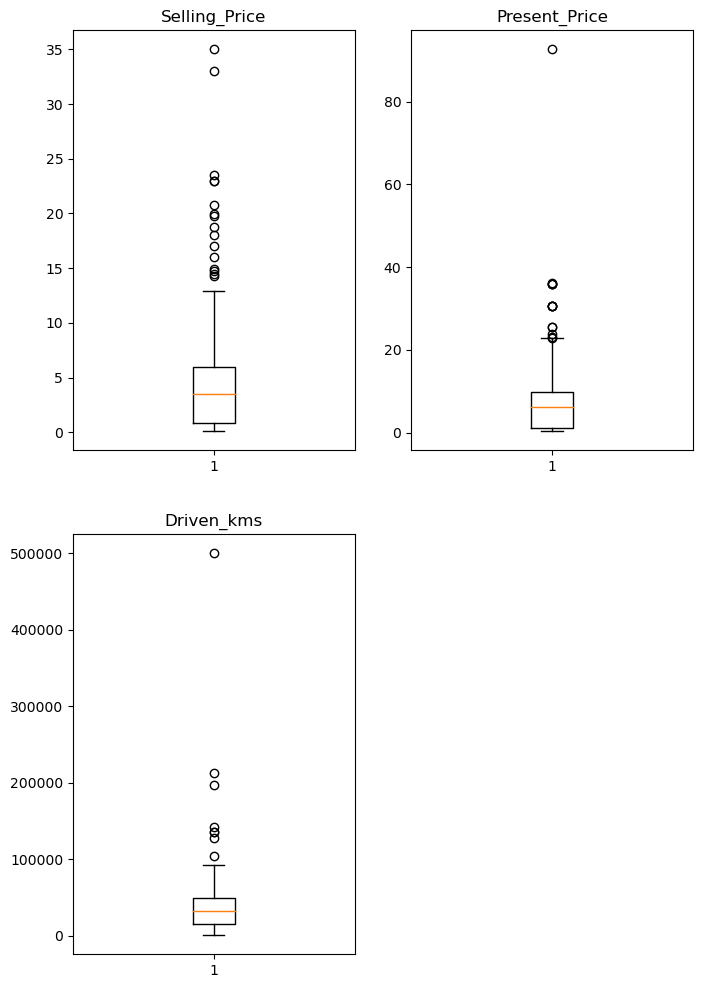

In [19]:
#visualizatoin to see the outliers

fig, ax = plt.subplots(2, 2, figsize=(8, 12))

# Boxplot for Selling_Price
ax[0, 0].boxplot(x=df[['Selling_Price']])
ax[0, 0].set_title('Selling_Price')

# Boxplot for Present_Price
ax[0, 1].boxplot(x=df[['Present_Price']])
ax[0, 1].set_title('Present_Price')

# Boxplot for Driven_kms
ax[1, 0].boxplot(x=df[['Driven_kms']])
ax[1, 0].set_title('Driven_kms')

# Remove the last subplot (ax[1, 1]) from the layout
fig.delaxes(ax[1, 1])

plt.show()

In [20]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'Selling_Price'
Q1_Selling_Price=df['Selling_Price'].quantile(0.25)
Q3_Selling_Price=df['Selling_Price'].quantile(0.75)
IQR_Selling_Price=Q3_Selling_Price - Q1_Selling_Price
print(IQR_Selling_Price)

5.15


In [21]:
df = df [~((df['Selling_Price']<(Q1_Selling_Price-1.5*IQR_Selling_Price))|(df['Selling_Price']>(Q3_Selling_Price+1.5*IQR_Selling_Price)))]

<Axes: xlabel='Selling_Price'>

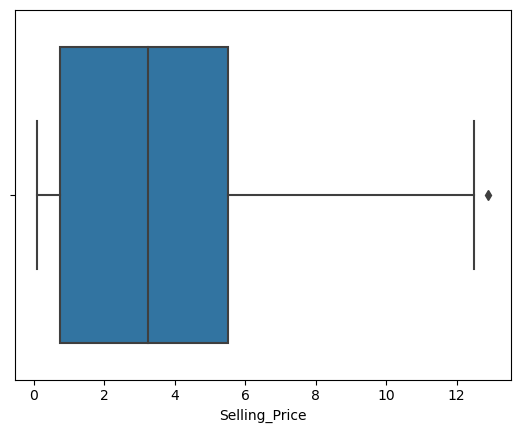

In [22]:
#let's visualize after detecting outliers in Selling_Price
sns.boxplot(x='Selling_Price', data=df)

In [23]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'Present_Price'
Q1_Present_Price=df['Present_Price'].quantile(0.25)
Q3_Present_Price=df['Present_Price'].quantile(0.75)
IQR_Present_Price=Q3_Present_Price - Q1_Present_Price
print(IQR_Present_Price)

8.38


In [24]:
df = df [~((df['Present_Price']<(Q1_Present_Price-1.5*IQR_Selling_Price))|(df['Present_Price']>(Q3_Present_Price+1.5*IQR_Present_Price)))]

<Axes: xlabel='Present_Price'>

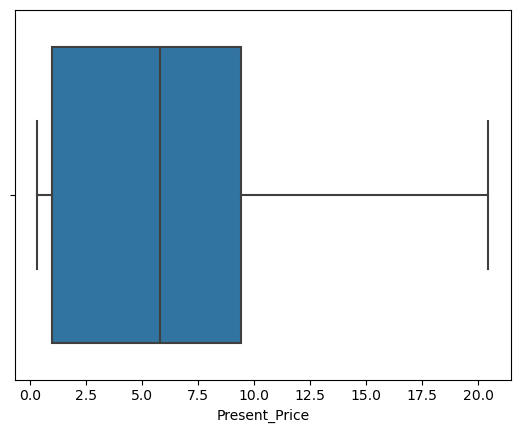

In [25]:
#let's visualize after detecting outliers in Present_Price
sns.boxplot(x='Present_Price', data=df)

In [26]:
#Q1 and Q3 calculations, and the interquartile range (IQR) for the 'Driven_kms'
Q1_Driven_kms=df['Driven_kms'].quantile(0.25)
Q3_Driven_kms=df['Driven_kms'].quantile(0.75)
IQR_Driven_kms=Q3_Driven_kms - Q1_Driven_kms
print(IQR_Driven_kms)

31779.5


In [27]:
df = df [~((df['Driven_kms']<(Q1_Driven_kms-1.5*IQR_Driven_kms))|(df['Driven_kms']>(Q3_Driven_kms+1.5*IQR_Driven_kms)))]

<Axes: xlabel='Driven_kms'>

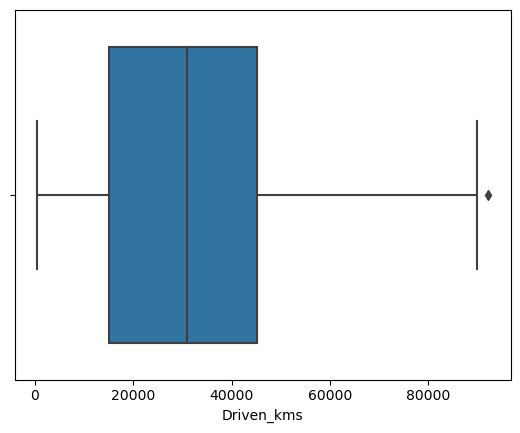

In [28]:
#let's visualize after detecting outliers in Driven_kms
sns.boxplot(x='Driven_kms', data=df)

# label encoding

In [29]:
#we need to encode the columns Car_Name&Fuel_Type&Transmission      
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Apply label encoding to each categorical column
df['Car_Name_encoded'] = label_encoder.fit_transform(df['Car_Name'])
df['Fuel_Type_encoded'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Selling_type_encoded'] = label_encoder.fit_transform(df['Selling_type'])
df['Transmission_encoded'] = label_encoder.fit_transform(df['Transmission'])

In [30]:
#see our data to check that the needed encoded columns are encoded
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Name_encoded,Fuel_Type_encoded,Selling_type_encoded,Transmission_encoded
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,86,2,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,89,1,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,66,2,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,92,2,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,88,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,67,1,0,1
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,65,2,0,1
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,67,2,0,1
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,67,1,0,1


# Data Visualization

In [31]:
#the most high Selling_Price value in detials like car_name
df.loc[df['Selling_Price'].idxmax()]

Car_Name                 creta
Year                      2016
Selling_Price             12.9
Present_Price             13.6
Driven_kms               35934
Fuel_Type               Diesel
Selling_type            Dealer
Transmission            Manual
Owner                        0
Car_Name_encoded            69
Fuel_Type_encoded            1
Selling_type_encoded         0
Transmission_encoded         1
Name: 250, dtype: object

In [32]:
#the most high Present_Price value in detials like car_name
df.loc[df['Present_Price'].idxmax()]

Car_Name                fortuner
Year                        2010
Selling_Price               9.25
Present_Price              20.45
Driven_kms                 59000
Fuel_Type                 Diesel
Selling_type              Dealer
Transmission              Manual
Owner                          0
Car_Name_encoded              78
Fuel_Type_encoded              1
Selling_type_encoded           0
Transmission_encoded           1
Name: 67, dtype: object

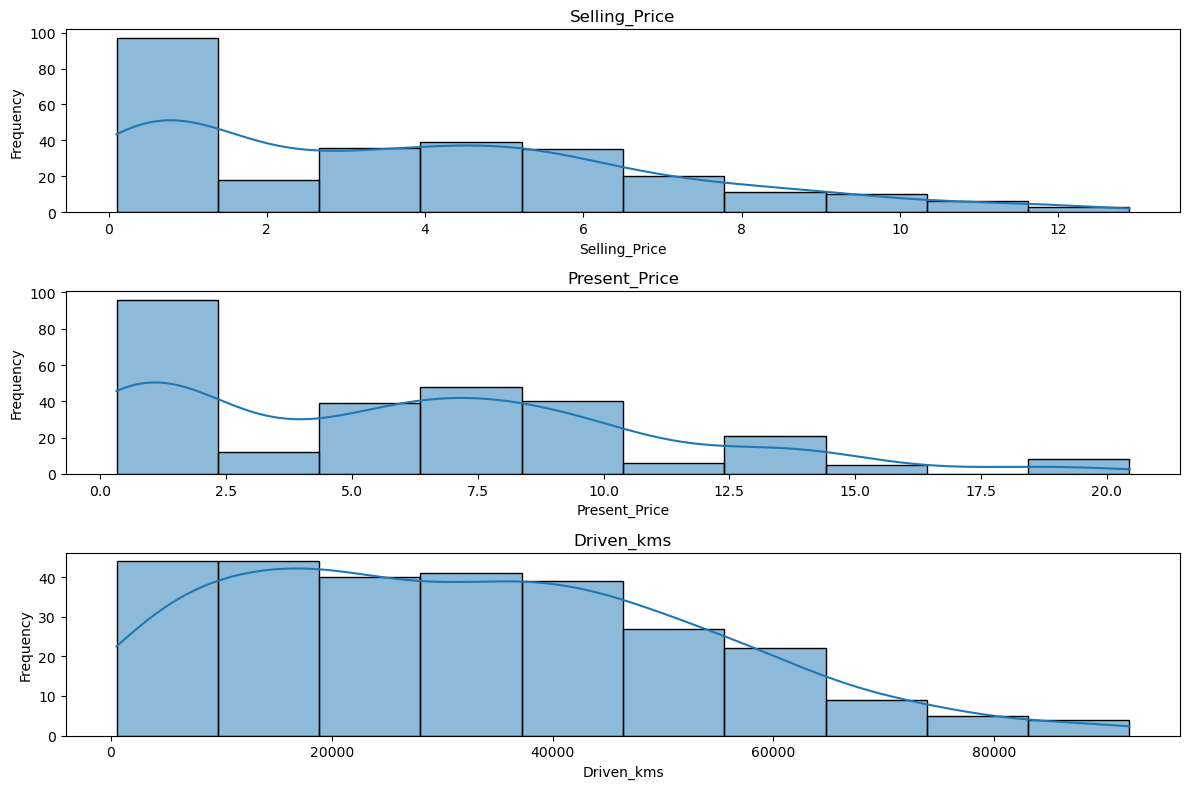

In [33]:
# Distribution of 'Selling_Price'&'Present_Price'&'Driven_kms'
numerical_features = ['Selling_Price', 'Present_Price', 'Driven_kms']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 1, i)
    sns.histplot(data=df[feature], bins=10, kde=True)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency')   
plt.tight_layout()
plt.show()

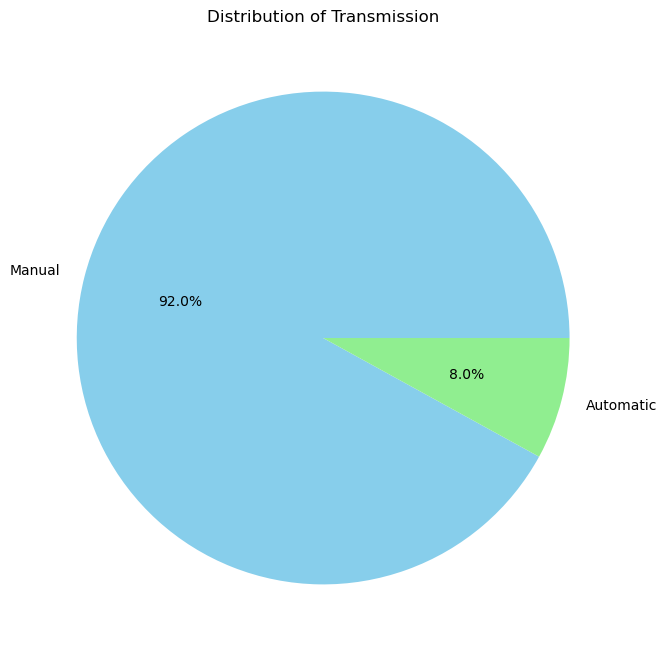

In [34]:
# Visualization: Distribution of Transmission
Transmission_counts = df['Transmission'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(Transmission_counts, labels=Transmission_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Distribution of Transmission')
plt.show()

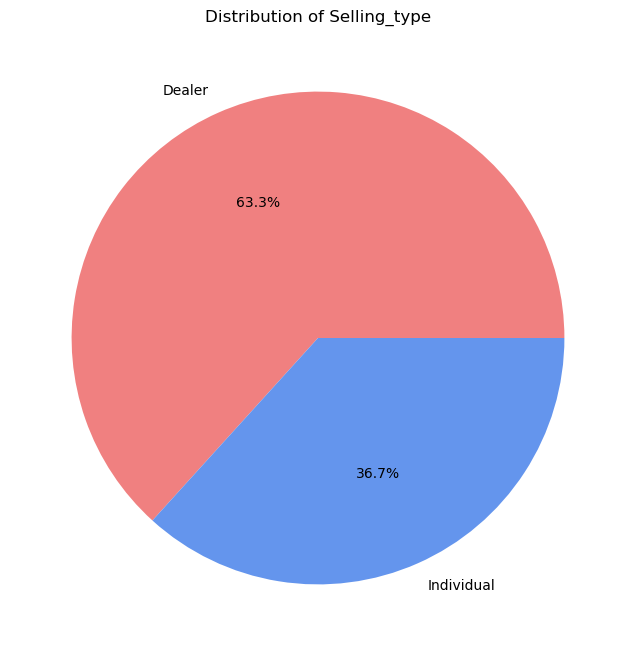

In [35]:
# Visualization: Distribution of Selling_type
Selling_type_counts = df['Selling_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(Selling_type_counts, labels=Selling_type_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'cornflowerblue'])
plt.title('Distribution of Selling_type')
plt.show()

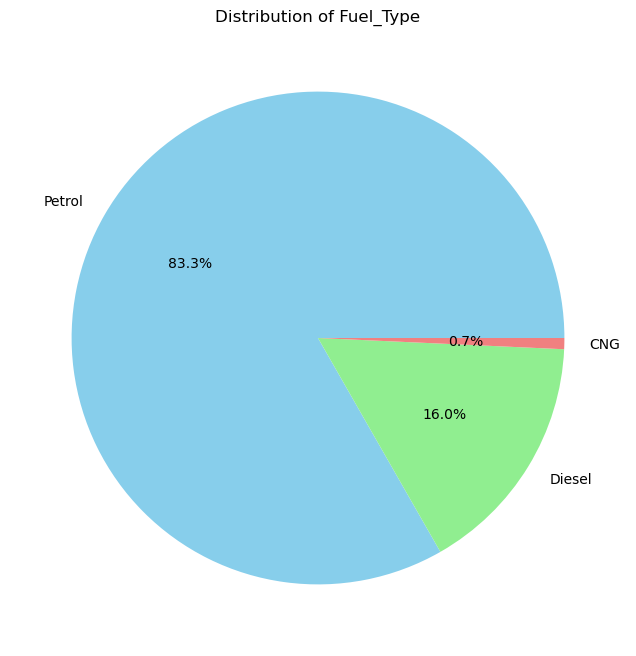

In [36]:
# Visualization: Distribution of Fuel_Type
Fuel_Type_counts = df['Fuel_Type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(Fuel_Type_counts, labels=Fuel_Type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Fuel_Type')
plt.show()

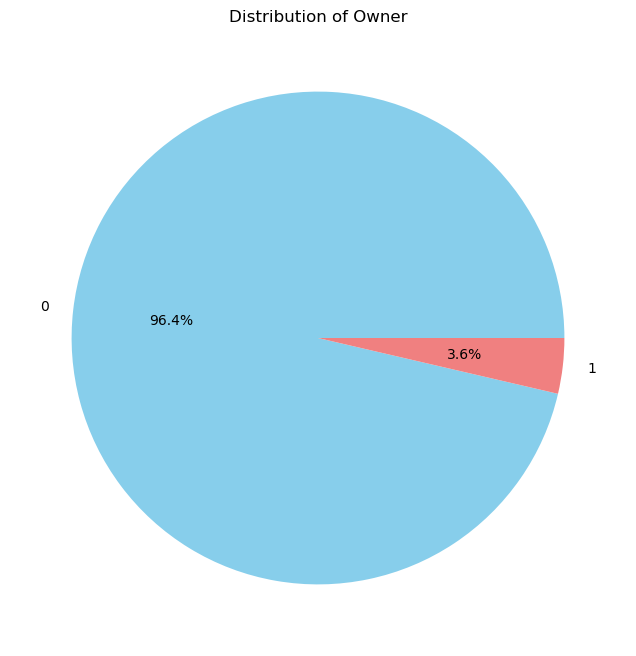

In [37]:
# Visualization: Distribution of Owner
Owner_Type_counts = df['Owner'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(Owner_Type_counts, labels=Owner_Type_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Owner')
plt.show()

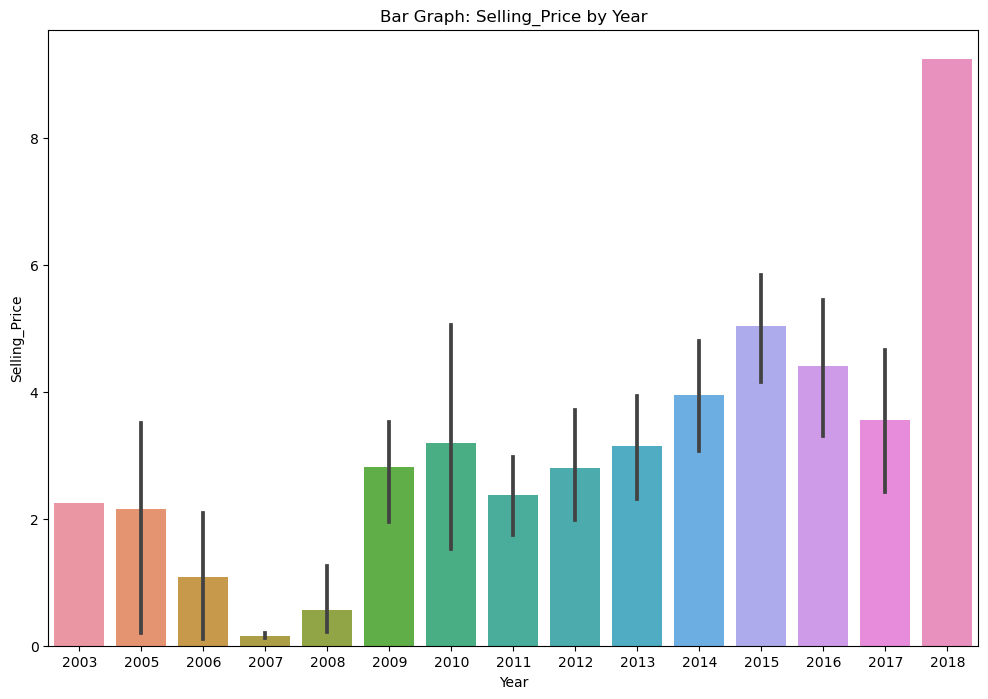

In [38]:
#graph between 'Selling_Price' and 'Year'
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Selling_Price', data=df)
plt.title('Bar Graph: Selling_Price by Year')
plt.xlabel('Year')
plt.ylabel('Selling_Price')
plt.show()

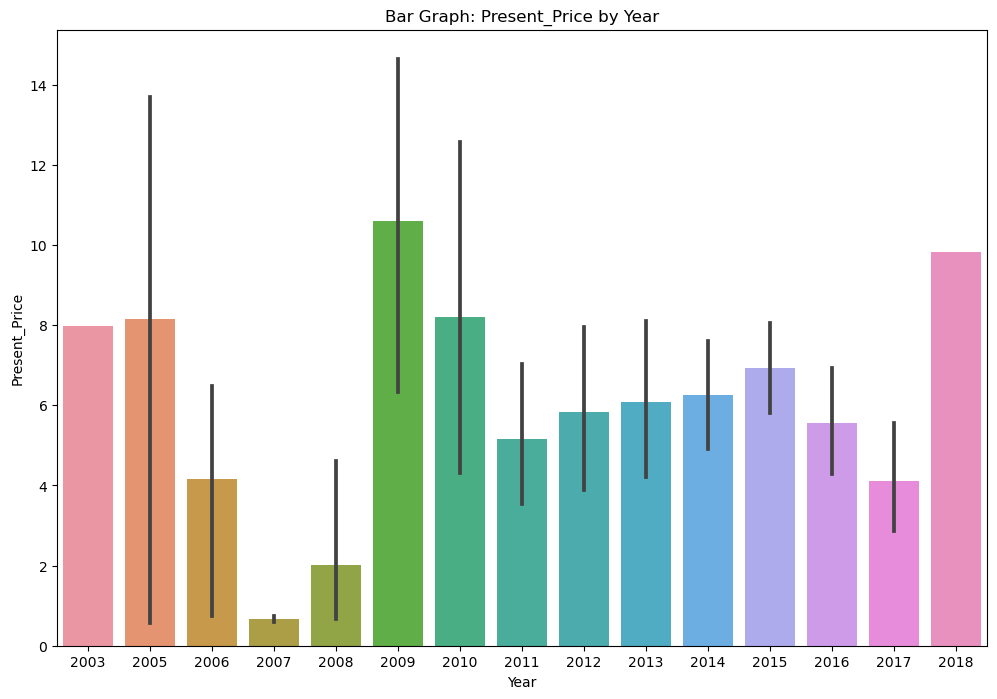

In [39]:
#graph between 'Present_Price' and 'Year'
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Present_Price', data=df)
plt.title('Bar Graph: Present_Price by Year')
plt.xlabel('Year')
plt.ylabel('Present_Price')
plt.show()

# let's build our Linear_Regression model

In [40]:
#let's the name of columns
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner',
       'Car_Name_encoded', 'Fuel_Type_encoded', 'Selling_type_encoded',
       'Transmission_encoded'],
      dtype='object')

In [41]:
# Split the data into features (X) and target variable (y)
X = df[['Year', 'Present_Price', 'Driven_kms','Owner', 'Car_Name_encoded', 'Fuel_Type_encoded', 'Selling_type_encoded', 'Transmission_encoded']]
y = df['Selling_Price']

# Testing Model 

In [42]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1.47
R-squared: 0.88


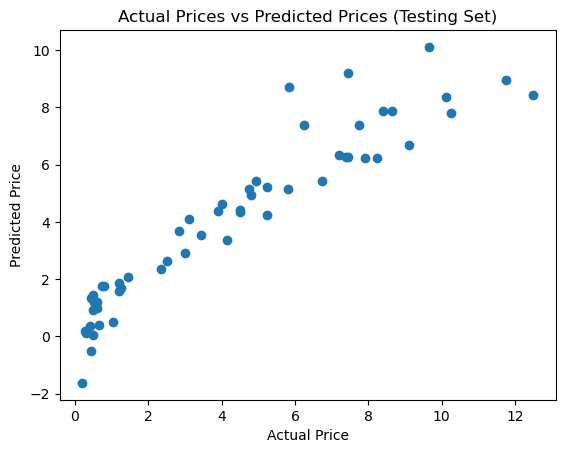

In [43]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices (Testing Set)")
plt.show()

# Training Model

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1.47
R-squared: 0.88


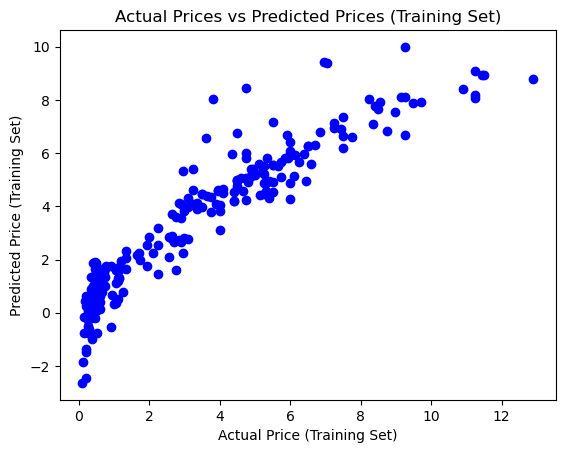

In [45]:
# Scatter plot for the training set
plt.scatter(y_train, y_train_pred, color='blue', marker='o')
plt.xlabel("Actual Price (Training Set)")
plt.ylabel("Predicted Price (Training Set)")
plt.title("Actual Prices vs Predicted Prices (Training Set)")
plt.show()

In [46]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
31,2.35,2.364196,-0.014196
163,0.45,-0.524971,0.974971
221,4.50,4.419376,0.080624
150,0.50,0.066142,0.433858
241,4.75,5.165888,-0.415888
259,3.90,4.389447,-0.489447
276,8.65,7.885922,0.764078
228,4.95,5.435626,-0.485626
279,6.25,7.392470,-1.142470
166,0.45,1.348936,-0.898936


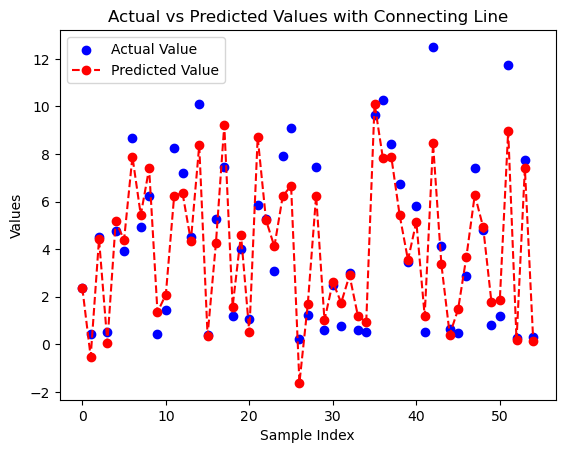

In [47]:
# Scatter plot with a line connecting the points
plt.scatter(range(len(y_test)), y_test, label='Actual Value', color='blue', marker='o')
plt.plot(range(len(y_test)), y_pred, label='Predicted Value', color='red', marker='o', linestyle='dashed')
plt.xlabel("Sample Index")
plt.ylabel("Values")
plt.title("Actual vs Predicted Values with Connecting Line")
plt.legend()
plt.show()

In [48]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner',
       'Car_Name_encoded', 'Fuel_Type_encoded', 'Selling_type_encoded',
       'Transmission_encoded'],
      dtype='object')

In [49]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       'baleno', 'omni', 'innova', 'corolla altis', 'etios cross',
       'etios g', 'etios liva', 'fortuner', 'etios gd',
       'Royal Enfield Thunder 500', 'UM Renegade Mojave', 'KTM RC200',
       'Bajaj Dominar 400', 'Royal Enfield Classic 350', 'KTM RC390',
       'Hyosung GT250R', 'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 'Hero Passion X pro', 'Bajaj Pulsar NS 200',
     

In [50]:
df['Car_Name_encoded'].unique()

array([86, 89, 66, 92, 88, 91, 87, 61, 73, 70, 62, 82, 64, 85, 83, 68, 74,
       75, 77, 78, 76, 48, 55, 41, 10, 45, 42, 39, 47, 40, 43, 16, 44, 46,
        5,  3, 31, 59, 57, 50, 13, 36, 19,  6,  4, 56, 11, 14, 51, 25, 15,
       60, 30, 53, 37,  7, 27,  0, 24, 33, 58, 12,  1, 34, 21, 38, 29, 52,
       22, 26, 32,  8, 49, 54, 35, 20, 28,  9, 23, 18, 17,  2, 81, 79, 80,
       72, 93, 71, 69, 90, 67, 65, 63, 84])

# applying the model

In [51]:
# Split the data into features (X) and target variable (y)
X = df[['Year', 'Present_Price', 'Driven_kms', 'Owner', 'Car_Name_encoded', 'Fuel_Type_encoded', 'Selling_type_encoded', 'Transmission_encoded']]
y = df['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Input values from the user for new data
year = float(input("Enter the Year: "))
present_price = float(input("Enter the Present_Price: "))
driven_kms = float(input("Enter the Driven_kms: "))
fuel_type = input("Enter the Fuel_Type: ")
selling_type = input("Enter the Selling_type: ")
transmission = input("Enter the Transmission: ")
car_name = input("Enter the Car_Name: ")
owner = float(input("Enter the Owner: "))

# Create a DataFrame for new data
new_data = pd.DataFrame({
    'Year': [year],
    'Present_Price': [present_price],
    'Driven_kms': [driven_kms],
    'Owner': [owner],
    'Car_Name_encoded': [car_name],
    'Fuel_Type_encoded': [fuel_type],
    'Selling_type_encoded': [selling_type],
    'Transmission_encoded': [transmission]
})

# Mapping for categorical variables
fuel_type_mapping = {'Petrol': 0, 'Diesel': 1, 'CNG': 2}
selling_type_mapping = {'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}
transmission_mapping = {'Manual': 0, 'Automatic': 1}
car_name_mapping = {
    'ritz': 86, 'sx4': 89, 'ciaz': 66, 'wagon r': 92, 'swift': 88,
    'vitara brezza': 91, 's cross': 87, 'alto 800': 61, 'ertiga': 73,
    'dzire': 70, 'alto k10': 62, 'ignis': 82, 'baleno': 64, 'omni': 85,
    'innova': 83, 'corolla altis': 68, 'etios cross': 74, 'etios g': 75,
    'etios liva': 77, 'fortuner': 78, 'etios gd': 76, 'Royal Enfield Thunder 500': 48,
    'UM Renegade Mojave': 55, 'KTM RC200': 41, 'Bajaj Dominar 400': 10,
    'Royal Enfield Classic 350': 45, 'KTM RC390': 42, 'Hyosung GT250R': 39,
    'Royal Enfield Thunder 350': 47, 'KTM 390 Duke ': 40, 'Mahindra Mojo XT300': 43,
    'Bajaj Pulsar RS200': 16, 'Royal Enfield Bullet 350': 44, 'Royal Enfield Classic 500': 46,
    'Bajaj Avenger 220': 5, 'Bajaj Avenger 150': 3, 'Honda CB Hornet 160R': 31,
    'Yamaha FZ S V 2.0': 59, 'Yamaha FZ 16': 57, 'TVS Apache RTR 160': 50,
    'Bajaj Pulsar 150': 13, 'Honda CBR 150': 36, 'Hero Extreme': 19,
    'Bajaj Avenger 220 dtsi': 6, 'Bajaj Avenger 150 street': 4,
    'Yamaha FZ  v 2.0': 56, 'Bajaj Pulsar  NS 200': 11, 'Bajaj Pulsar 220 F': 14,
    'TVS Apache RTR 180': 51, 'Hero Passion X pro': 25, 'Bajaj Pulsar NS 200': 15,
    'Yamaha Fazer ': 60, 'Honda Activa 4G': 30, 'TVS Sport ': 53,
    'Honda Dream Yuga ': 37, 'Bajaj Avenger Street 220': 7,
    'Hero Splender iSmart': 27, 'Activa 3g': 0, 'Hero Passion Pro': 24,
    'Honda CB Trigger': 33, 'Yamaha FZ S ': 58, 'Bajaj Pulsar 135 LS': 12,
    'Activa 4g': 1, 'Honda CB Unicorn': 34, 'Hero Honda CBZ extreme': 21,
    'Honda Karizma': 38, 'Honda Activa 125': 29, 'TVS Jupyter': 52,
    'Hero Honda Passion Pro': 22, 'Hero Splender Plus': 26, 'Honda CB Shine': 32,
    'Bajaj Discover 100': 8, 'Suzuki Access 125': 49, 'TVS Wego': 54,
    'Honda CB twister': 35, 'Hero Glamour': 20, 'Hero Super Splendor': 28,
    'Bajaj Discover 125': 9, 'Hero Hunk': 23, 'Hero  Ignitor Disc': 18,
    'Hero  CBZ Xtreme': 17, 'Bajaj  ct 100': 2, 'i20': 81, 'grand i10': 79,
    'i10': 80, 'eon': 72, 'xcent': 93, 'elantra': 71, 'creta': 69,
    'verna': 90, 'city': 67, 'brio': 65, 'amaze': 63, 'jazz': 84
}

# Apply mapping to new_data
new_data['Fuel_Type_encoded'] = new_data['Fuel_Type_encoded'].map(fuel_type_mapping)
new_data['Selling_type_encoded'] = new_data['Selling_type_encoded'].map(selling_type_mapping)
new_data['Transmission_encoded'] = new_data['Transmission_encoded'].map(transmission_mapping)
new_data['Car_Name_encoded'] = new_data['Car_Name_encoded'].map(car_name_mapping)
# Make predictions on the new data using the trained model
new_pred = model.predict(new_data)

# Display the results
print("-------------------------------------")
print("Predicted Selling Price : {}".format(abs(new_pred[0])))


Enter the Year: 2024
Enter the Present_Price: 5.66
Enter the Driven_kms: 23467
Enter the Fuel_Type: Petrol
Enter the Selling_type: Dealer
Enter the Transmission: Manual
Enter the Car_Name: xcent
Enter the Owner: 0
-------------------------------------
Predicted Selling Price : 7.609217482018494


In [52]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_Name_encoded,Fuel_Type_encoded,Selling_type_encoded,Transmission_encoded
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,86,2,0,1
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,89,1,0,1
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,66,2,0,1
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,92,2,0,1
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,88,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,67,1,0,1
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,65,2,0,1
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,67,2,0,1
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,67,1,0,1


# Thanks Oasis infobyte